###### **ASSIGNMENT 1**
**Rhea Bajpai** <br>


# <b>Advertisement Click Prediction</b>
## **Abstract**
<p>Advertisement click prediction is a data science problem that aims to predict if a user will click on an online advertisement or not. The prediction is made based on a variety of features related to the user, the advertisement, and the  in which the ad is displayed.</p>





# 1. Data Preprocessing Tools

## a) Importing the libraries

In [ ]:
#installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import warnings
from sklearn.impute import KNNImputer
warnings.filterwarnings('ignore')

In [ ]:
data_train = pd.read_csv('https://raw.githubusercontent.com/Rhea3110/DSEM/main/Ad_click_prediction_train.csv')
data_train=data_train.drop('DateTime',axis=1)
data_train=data_train.drop('user_id',axis=1)
data_train=data_train.drop('session_id',axis=1)
print(data_train.head().to_markdown())
print(data_train.shape)

|    | product   |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id | gender   |   age_level |   user_depth |   city_development_index |   var_1 |   is_click |
|---:|:----------|--------------:|-------------:|---------------------:|---------------------:|----------------:|:---------|------------:|-------------:|-------------------------:|--------:|-----------:|
|  0 | C         |        359520 |        13787 |                    4 |                  nan |              10 | Female   |           4 |            3 |                        3 |       0 |          0 |
|  1 | C         |        105960 |        11085 |                    5 |                  nan |               8 | Female   |           2 |            2 |                      nan |       0 |          0 |
|  2 | C         |        359520 |        13787 |                    4 |                  nan |               8 | Female   |           2 |            2 |                      nan |    

In [ ]:
print(data_train.columns)

Index(['product', 'campaign_id', 'webpage_id', 'product_category_1',
       'product_category_2', 'user_group_id', 'gender', 'age_level',
       'user_depth', 'city_development_index', 'var_1', 'is_click'],
      dtype='object')


In [ ]:
data_test = pd.read_csv('https://raw.githubusercontent.com/Rhea3110/DSEM/main/Ad_Click_prediciton_test.csv')
data_test=data_test.drop('DateTime',axis=1)
data_test=data_test.drop('user_id',axis=1)
data_test=data_test.drop('session_id',axis=1)
print(data_test.head().to_markdown())
print(data_test.shape)

|    | product   |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id | gender   |   age_level |   user_depth |   city_development_index |   var_1 |
|---:|:----------|--------------:|-------------:|---------------------:|---------------------:|----------------:|:---------|------------:|-------------:|-------------------------:|--------:|
|  0 | J         |        404347 |        53587 |                    1 |                  nan |               5 | Male     |           5 |            3 |                      nan |       0 |
|  1 | I         |        118601 |        28529 |                    3 |                82527 |             nan | nan      |         nan |          nan |                      nan |       1 |
|  2 | I         |        118601 |        28529 |                    4 |                82527 |             nan | nan      |         nan |          nan |                      nan |       1 |
|  3 | G         |        118601 |        285

In [ ]:
print(data_train.describe().to_markdown())

|       |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |    age_level |   user_depth |   city_development_index |         var_1 |      is_click |
|:------|--------------:|-------------:|---------------------:|---------------------:|----------------:|-------------:|-------------:|-------------------------:|--------------:|--------------:|
| count |        463291 |     463291   |         463291       |              97437   |    445048       | 445048       | 445048       |            338162        | 463291        | 463291        |
| mean  |        308475 |      29685.9 |              3.07243 |             162753   |         3.4774  |      2.78227 |      2.87842 |                 2.55712  |      0.422169 |      0.067627 |
| std   |        126517 |      21542.1 |              1.30423 |              78743.7 |         2.41289 |      1.0697  |      0.40013 |                 0.921345 |      0.493906 |      0.251105 |
| min   |         82320 |     

In [ ]:
numColumns = data_train.select_dtypes("number").columns
StringColumns = data_train.select_dtypes("object").columns
numColumns= list(set(numColumns))
StringColumns= list(set(StringColumns))
print(f"Number Columns: {numColumns},\nString Columns: {StringColumns}")

Number Columns: ['user_depth', 'webpage_id', 'city_development_index', 'user_group_id', 'is_click', 'age_level', 'campaign_id', 'product_category_1', 'product_category_2', 'var_1'],
String Columns: ['gender', 'product']


## b) Taking care of missing data

In [ ]:
#checking the count of null data in the current dataset 
missing_val_train=data_train.isnull().sum()
missing_val_test=data_test.isnull().sum()

print("Missing data in training set:\n",data_train.isnull().sum())
print()
print("Missing data in test set:\n",data_test.isnull().sum())

Missing data in training set:
 product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

Missing data in test set:
 product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64


In [ ]:
data_test.dropna(subset=['gender'], inplace=True) #data is categorical hence makes no value to impute is or replace it by a particular value
data_train.dropna(subset=['gender'], inplace=True)
#out of 4,20,000 data points product category has around 3,50,000 missing points so adds no value imputing it
data_test.dropna(subset=['product_category_2'], inplace=True)  
data_train.dropna(subset=['product_category_2'], inplace=True)


In [ ]:
#checking the count of null data in the current dataset 
print("Missing data in training set:\n",data_train.isnull().sum())
print()
print("Missing data in test set:\n",data_test.isnull().sum())

Missing data in training set:
 product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2            0
user_group_id                 0
gender                        0
age_level                     0
user_depth                    0
city_development_index    21009
var_1                         0
is_click                      0
dtype: int64

Missing data in test set:
 product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2            0
user_group_id                 0
gender                        0
age_level                     0
user_depth                    0
city_development_index    11047
var_1                         0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=2)
#data_train["product_category_2"] = imp.fit_transform(data_train[["product_category_2"]]).ravel()
data_train["city_development_index"] = imp.fit_transform(data_train[["city_development_index"]]).ravel()


In [ ]:

#data_test["product_category_2"] = imp.fit_transform(data_test[["product_category_2"]]).ravel()
data_test["city_development_index"] = imp.fit_transform(data_test[["city_development_index"]]).ravel()


In [ ]:
#checking the count of null data in the current dataset 
print("Missing data in training set:\n",data_train.isnull().sum())
print()
print("Missing data in test set:\n",data_test.isnull().sum())

Missing data in training set:
 product                   0
campaign_id               0
webpage_id                0
product_category_1        0
product_category_2        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
dtype: int64

Missing data in test set:
 product                   0
campaign_id               0
webpage_id                0
product_category_1        0
product_category_2        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
dtype: int64


<Figure size 576x360 with 0 Axes>

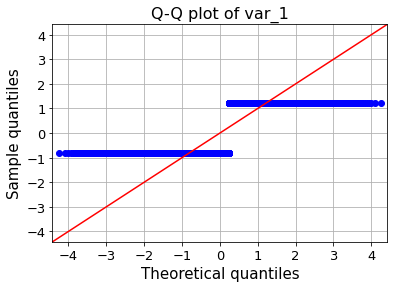

<Figure size 576x360 with 0 Axes>

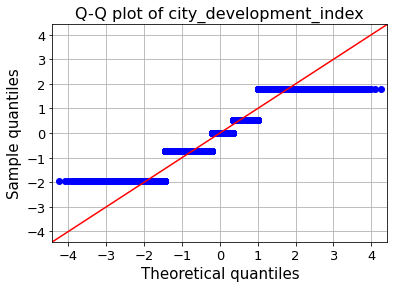

<Figure size 576x360 with 0 Axes>

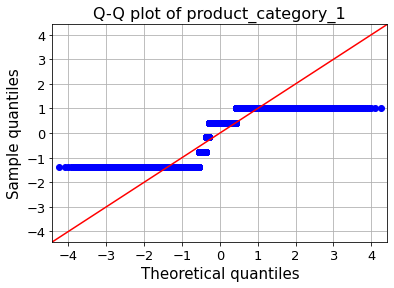

<Figure size 576x360 with 0 Axes>

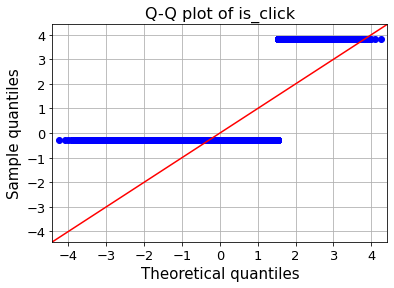

<Figure size 576x360 with 0 Axes>

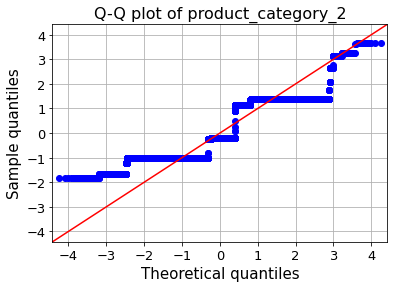

<Figure size 576x360 with 0 Axes>

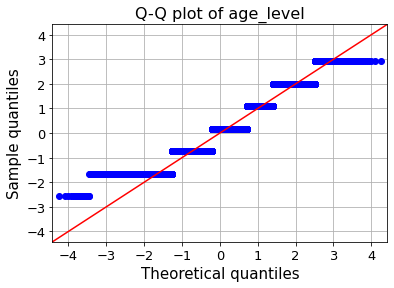

<Figure size 576x360 with 0 Axes>

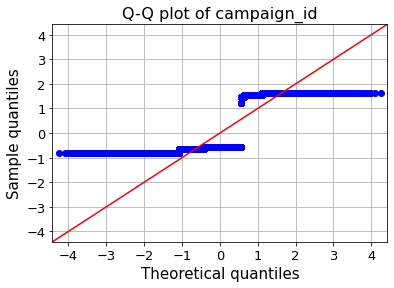

<Figure size 576x360 with 0 Axes>

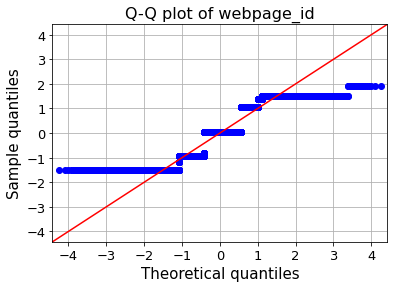

<Figure size 576x360 with 0 Axes>

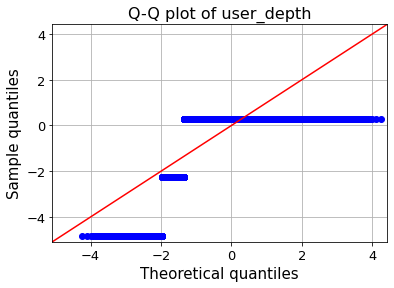

<Figure size 576x360 with 0 Axes>

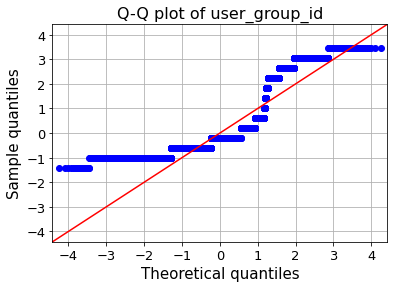

In [ ]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data_train[['var_1', 'city_development_index', 'product_category_1', 'is_click', 'product_category_2', 'age_level', 'campaign_id', 'webpage_id', 'user_depth', 'user_group_id']]

for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [ ]:
print(data_train.corr().head().to_markdown())

|                    |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |     var_1 |    is_click |
|:-------------------|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|----------:|------------:|
| campaign_id        |    1          |    0.868857  |            -0.355746 |             0.224442 |      0.00255235 |  -0.0465521 |  -0.0423758  |                0.0186387 | 0.0405454 |  0.0205278  |
| webpage_id         |    0.868857   |    1         |            -0.148858 |            -0.160874 |     -0.0412885  |  -0.0750814 |  -0.00531524 |               -0.0256665 | 0.0550314 |  0.00866386 |
| product_category_1 |   -0.355746   |   -0.148858  |             1        |             0.103925 |      0.1181     |   0.210153  |   0.0204158  |                0.0309111 | 0.0217546 | -0.0146104  |


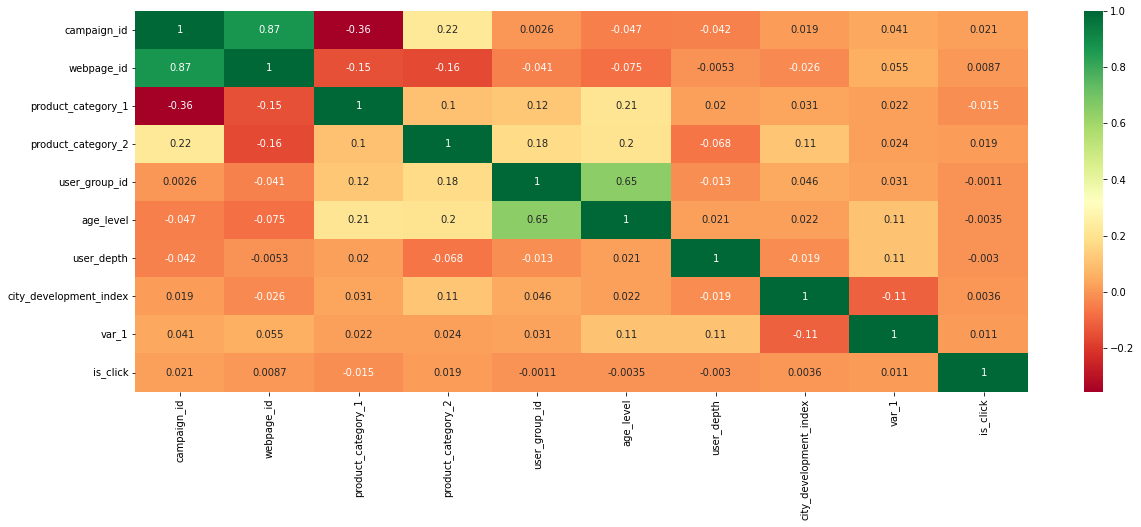

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data_train.corr(), annot=True, cmap='RdYlGn')

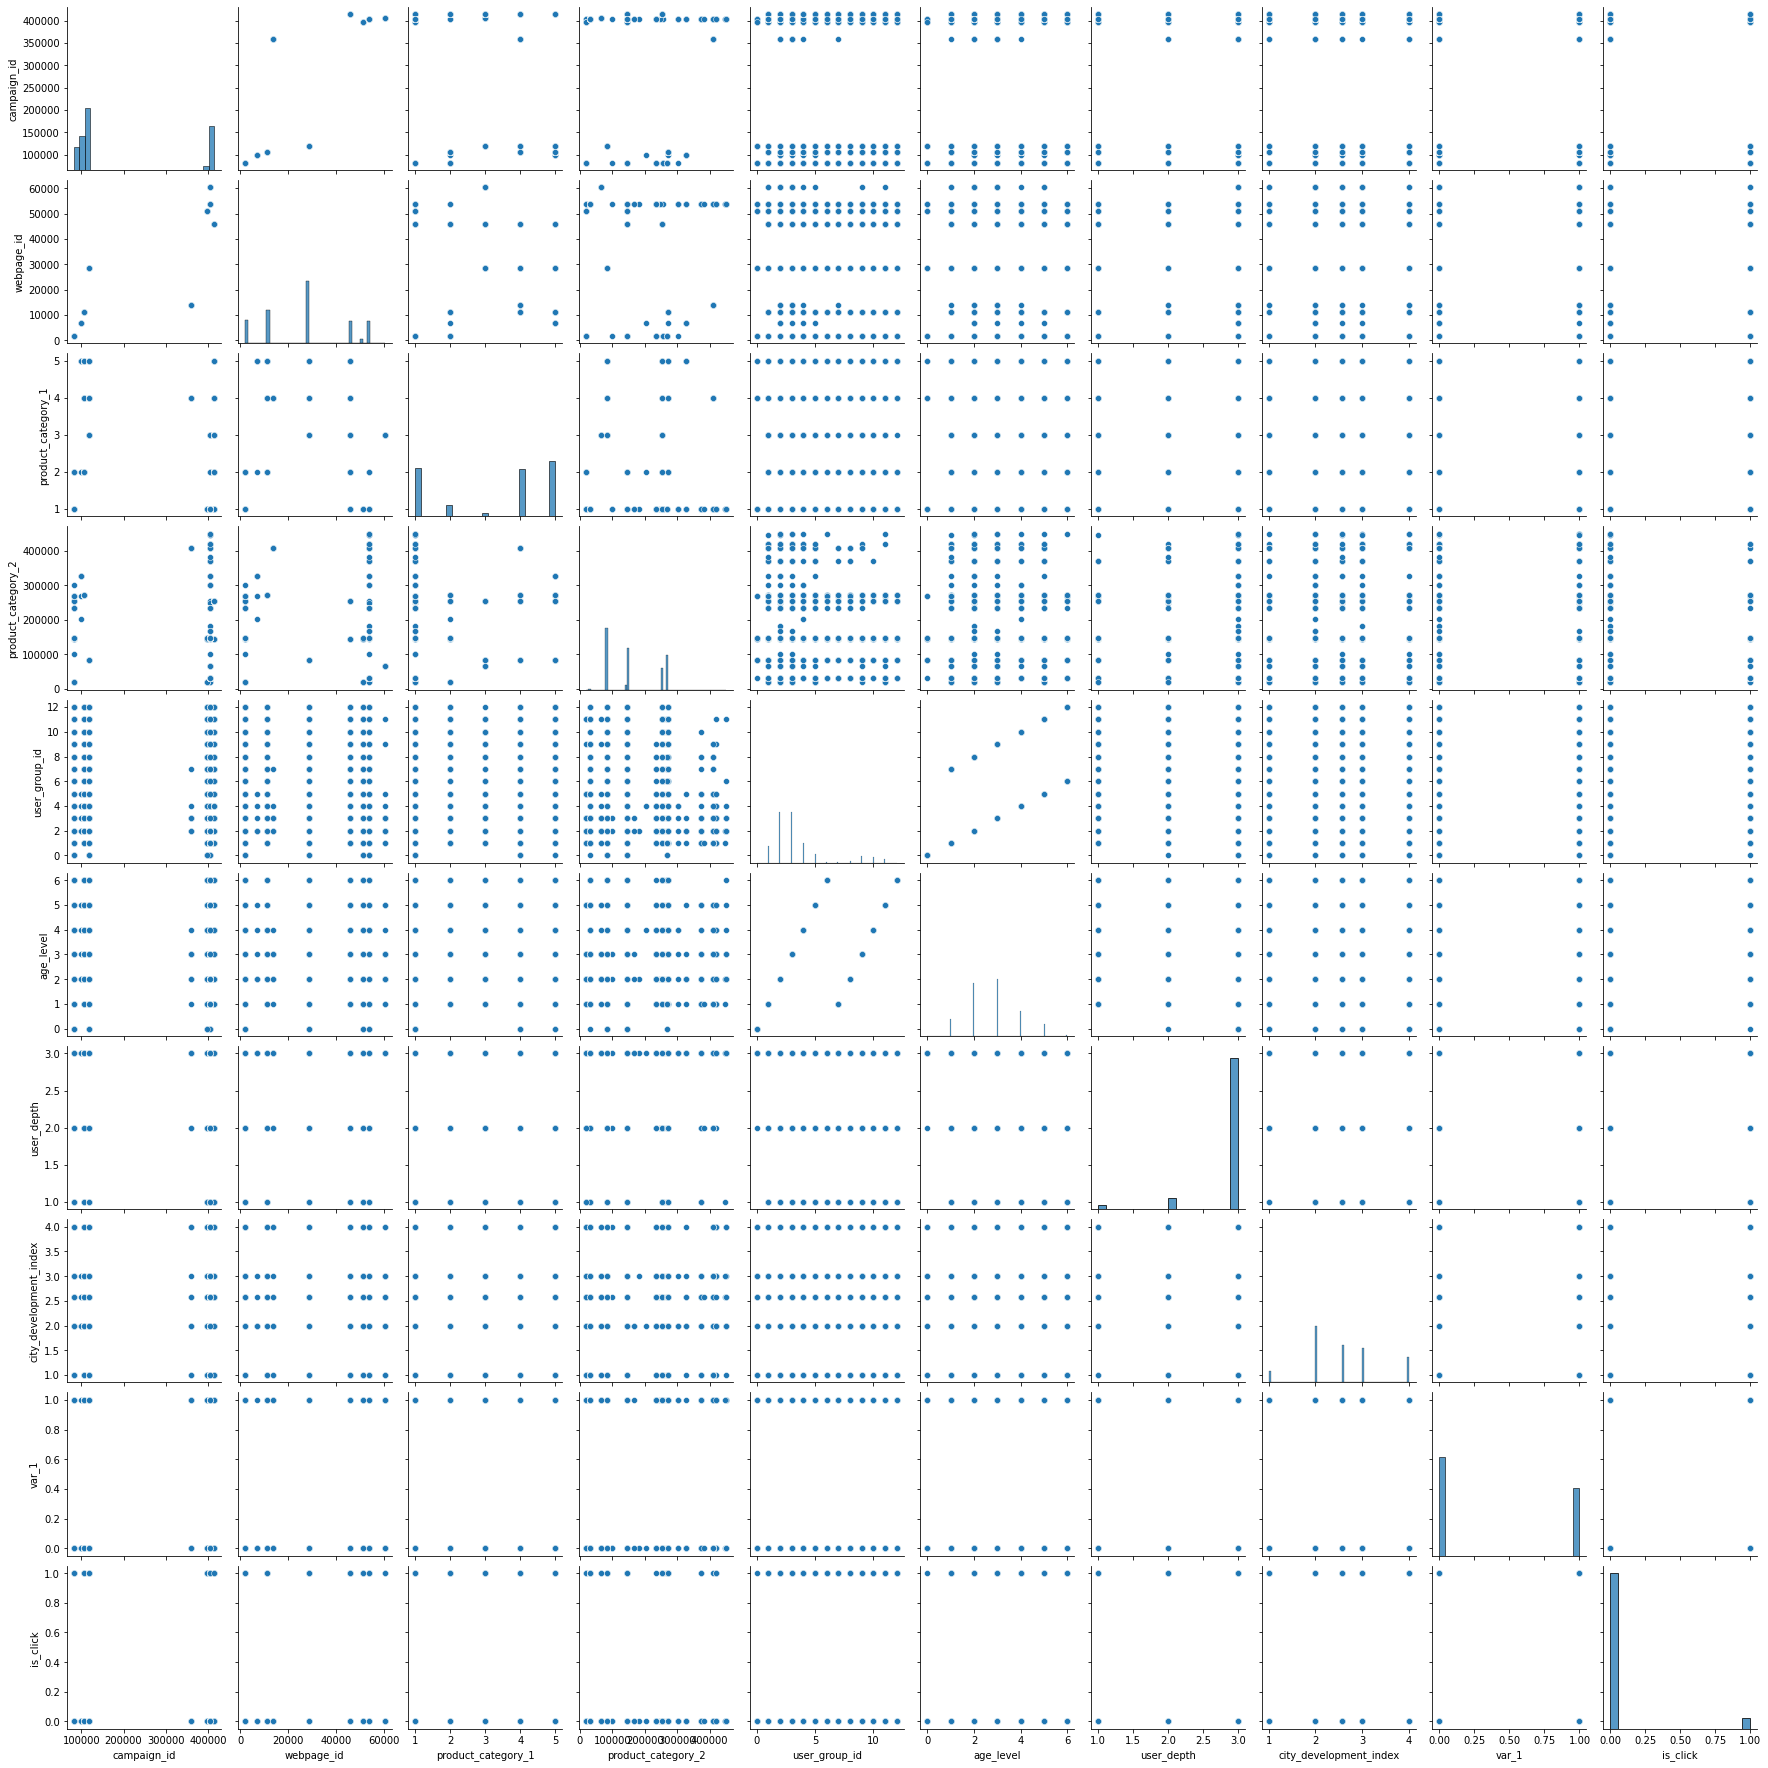

In [ ]:
sns.pairplot(data_train) 

## c) Feature Selection

In [ ]:
X_train = data_train.iloc[:, 0:-1]
y_train = data_train['is_click']
X_test = data_test.iloc[:, :]

In [ ]:
print(X_train.head().to_markdown())

|    | product   |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id | gender   |   age_level |   user_depth |   city_development_index |   var_1 |
|---:|:----------|--------------:|-------------:|---------------------:|---------------------:|----------------:|:---------|------------:|-------------:|-------------------------:|--------:|
| 17 | I         |        404347 |        53587 |                    1 |               146115 |               9 | Female   |           3 |            3 |                        3 |       1 |
| 21 | I         |        404347 |        53587 |                    1 |               146115 |               2 | Male     |           2 |            3 |                        4 |       1 |
| 42 | I         |        404347 |        53587 |                    1 |               146115 |               2 | Male     |           2 |            3 |                        1 |       1 |
| 48 | H         |        105960 |        110

In [ ]:
print(y_train.head().to_markdown())
print(y_train.shape)
print(type(y_train))

|    |   is_click |
|---:|-----------:|
| 17 |          0 |
| 21 |          0 |
| 42 |          0 |
| 48 |          0 |
| 49 |          0 |
(93669,)
<class 'pandas.core.series.Series'>


In [ ]:
print(X_test.head().to_markdown())

|    | product   |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id | gender   |   age_level |   user_depth |   city_development_index |   var_1 |
|---:|:----------|--------------:|-------------:|---------------------:|---------------------:|----------------:|:---------|------------:|-------------:|-------------------------:|--------:|
|  3 | G         |        118601 |        28529 |                    5 |                82527 |               1 | Male     |           1 |            3 |                  1       |       0 |
|  4 | H         |        118601 |        28529 |                    5 |                82527 |               9 | Female   |           3 |            1 |                  2.54708 |       1 |
|  5 | I         |        118601 |        28529 |                    4 |                82527 |               1 | Male     |           1 |            3 |                  4       |       1 |
|  6 | D         |        118601 |        285

## d) Encoding categorical data



In [ ]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

numCols1 = X_train.select_dtypes("number").columns
catCols1 = X_train.select_dtypes("object").columns
print(numCols1)

Index(['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male'],
      dtype='object')


In [ ]:
print(X_train.head().to_markdown())
print(X_test.head().to_markdown())


|    |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |   var_1 |   product_A |   product_B |   product_C |   product_D |   product_E |   product_F |   product_G |   product_H |   product_I |   product_J |   gender_Female |   gender_Male |
|---:|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|--------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|----------------:|--------------:|
| 17 |        404347 |        53587 |                    1 |               146115 |               9 |           3 |            3 |                        3 |       1 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           1 |           0 |         

In [ ]:
print(y_train)

17        0
21        0
42        0
48        0
49        0
         ..
463285    0
463286    0
463287    0
463288    0
463289    0
Name: is_click, Length: 93669, dtype: int64


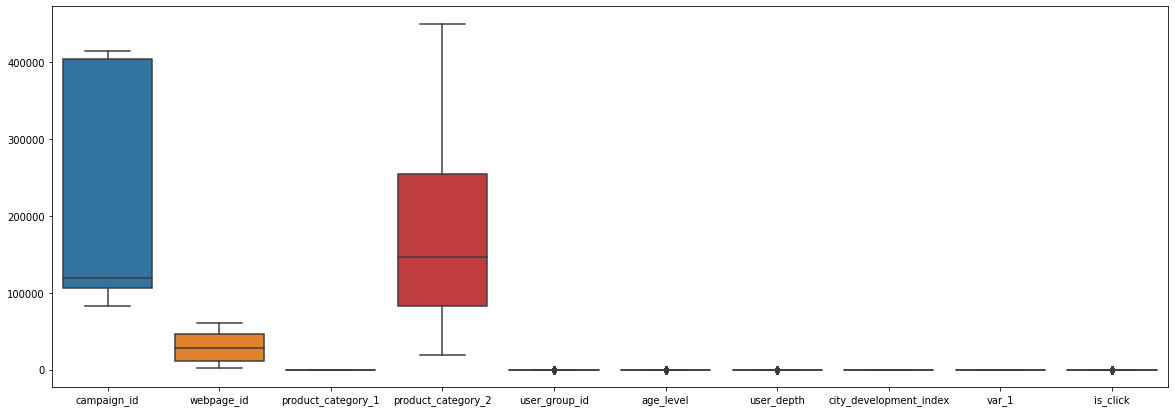

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.boxplot(data=data_train)

In [ ]:

from sklearn import preprocessing

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
#x_scaled = min_max_scaler.fit_transform(X_train)

# Run the normalizer on the dataframe
X_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]=min_max_scaler.fit_transform(X_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']])

X_test[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]=min_max_scaler.fit_transform(X_test[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']])

In [ ]:
print(X_train.head().to_markdown())

|    |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |   var_1 |   product_A |   product_B |   product_C |   product_D |   product_E |   product_F |   product_G |   product_H |   product_I |   product_J |   gender_Female |   gender_Male |
|---:|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|--------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|----------------:|--------------:|
| 17 |     0.970461  |     0.885302 |                    0 |             0.295466 |        0.75     |    0.5      |            1 |                 0.666667 |       1 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           0 |           1 |           0 |         

In [ ]:
print(X_train.columns)

Index(['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male'],
      dtype='object')


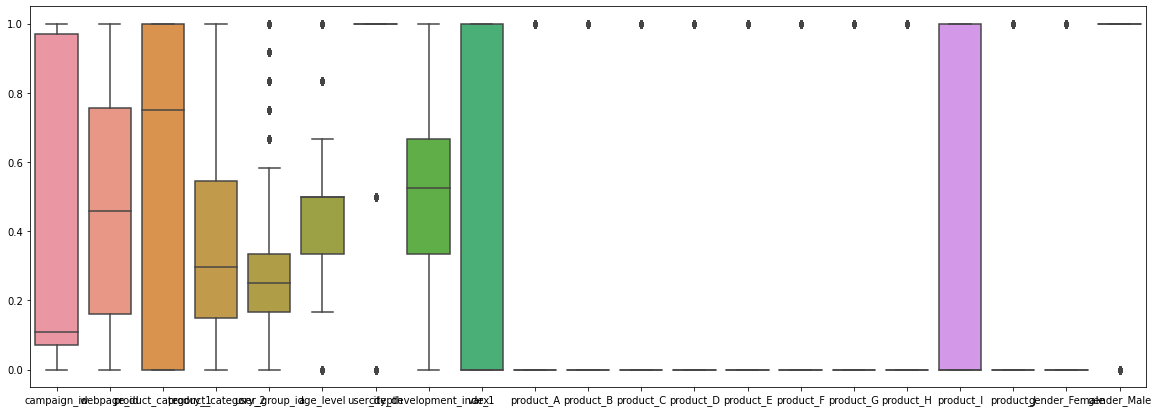

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X_train)

# 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)  

LogisticRegression(random_state=0)

In [ ]:
y_test_pred=classifier.predict(X_test)

In [ ]:
print(y_test_pred[0]) #output of the first prediction
#as there is no y_test we cant predict the accuracy of X_test

0


# 3. Imputation

In [ ]:
#I am imputing on copy dataset
data_train_copy= data_train.copy()
data_train_copy['age_level_copy_1_percent'] = data_train_copy[['age_level']]
data_train_copy['age_level_copy_5_percent'] =data_train_copy[['age_level']]
data_train_copy['age_level_copy_10_percent'] =data_train_copy[['age_level']]
print(data_train_copy.head().to_markdown())

|    | product   |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id | gender   |   age_level |   user_depth |   city_development_index |   var_1 |   is_click |   age_level_copy_1_percent |   age_level_copy_5_percent |   age_level_copy_10_percent |
|---:|:----------|--------------:|-------------:|---------------------:|---------------------:|----------------:|:---------|------------:|-------------:|-------------------------:|--------:|-----------:|---------------------------:|---------------------------:|----------------------------:|
| 17 | I         |        404347 |        53587 |                    1 |               146115 |               9 | Female   |           3 |            3 |                        3 |       1 |          0 |                          3 |                          3 |                           3 |
| 21 | I         |        404347 |        53587 |                    1 |               146115 |               2 | Male     |

In [ ]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    print(type(percent_missing))
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [ ]:
print(get_percent_missing(data_train_copy))

<class 'pandas.core.series.Series'>
                                         column_name  percent_missing
product                                      product              0.0
campaign_id                              campaign_id              0.0
webpage_id                                webpage_id              0.0
product_category_1                product_category_1              0.0
product_category_2                product_category_2              0.0
user_group_id                          user_group_id              0.0
gender                                        gender              0.0
age_level                                  age_level              0.0
user_depth                                user_depth              0.0
city_development_index        city_development_index              0.0
var_1                                          var_1              0.0
is_click                                    is_click              0.0
age_level_copy_1_percent    age_level_copy_1_percent  

In [ ]:
create_missing(data_train_copy, 0.01, 'age_level_copy_1_percent')
create_missing(data_train_copy, 0.05, 'age_level_copy_5_percent')
create_missing(data_train_copy, 0.1, 'age_level_copy_10_percent')

In [ ]:
print(get_percent_missing(data_train_copy))

<class 'pandas.core.series.Series'>
                                         column_name  percent_missing
product                                      product         0.000000
campaign_id                              campaign_id         0.000000
webpage_id                                webpage_id         0.000000
product_category_1                product_category_1         0.000000
product_category_2                product_category_2         0.000000
user_group_id                          user_group_id         0.000000
gender                                        gender         0.000000
age_level                                  age_level         0.000000
user_depth                                user_depth         0.000000
city_development_index        city_development_index         0.000000
var_1                                          var_1         0.000000
is_click                                    is_click         0.000000
age_level_copy_1_percent    age_level_copy_1_percent  

In [ ]:
print(data_train_copy.columns)

Index(['product', 'campaign_id', 'webpage_id', 'product_category_1',
       'product_category_2', 'user_group_id', 'gender', 'age_level',
       'user_depth', 'city_development_index', 'var_1', 'is_click',
       'age_level_copy_1_percent', 'age_level_copy_5_percent',
       'age_level_copy_10_percent'],
      dtype='object')


In [ ]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(data_train_copy['age_level_copy_1_percent'].isna())[0])
number_5_idx = list(np.where(data_train_copy['age_level_copy_5_percent'].isna())[0])
number_10_idx = list(np.where(data_train_copy['age_level_copy_10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(data_train_copy['age_level_copy_1_percent']))*100}% of total data in column | Total rows: {len(data_train_copy['age_level_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(data_train_copy['age_level_copy_5_percent']))*100}% of total data in column | Total rows: {len(data_train_copy['age_level_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(data_train_copy['age_level_copy_10_percent']))*100}% of total data in column | Total rows: {len(data_train_copy['age_level_copy_10_percent'])}")

Length of number_1_idx is 937 and it contains 1.0003309526097215% of total data in column | Total rows: 93669
Length of number_5_idx is 4683 and it contains 4.999519584921372% of total data in column | Total rows: 93669
Length of number_10_idx is 9367 and it contains 10.000106758906362% of total data in column | Total rows: 93669


In [ ]:
#Creating a seperate dataframe for performing the KNN imputation
df_number1= data_train_copy[['age_level', 'city_development_index', 'product_category_2', 'webpage_id', 'var_1', 'campaign_id', 'is_click', 'user_depth', 'user_group_id', 'product_category_1',
       'age_level_copy_1_percent', 'age_level_copy_5_percent',
       'age_level_copy_10_percent']]
imputer = KNNImputer(n_neighbors=2)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number1).round().__abs__(), columns =df_number1.columns)

In [ ]:
print(imputed_number_df.head(10).to_markdown())

|    |   age_level |   city_development_index |   product_category_2 |   webpage_id |   var_1 |   campaign_id |   is_click |   user_depth |   user_group_id |   product_category_1 |   age_level_copy_1_percent |   age_level_copy_5_percent |   age_level_copy_10_percent |
|---:|------------:|-------------------------:|---------------------:|-------------:|--------:|--------------:|-----------:|-------------:|----------------:|---------------------:|---------------------------:|---------------------------:|----------------------------:|
|  0 |           3 |                        3 |               146115 |        53587 |       1 |        404347 |          0 |            3 |               9 |                    1 |                          3 |                          3 |                           3 |
|  1 |           2 |                        4 |               146115 |        53587 |       1 |        404347 |          0 |            3 |               2 |                    1 |             

In [ ]:
print(get_percent_missing(imputed_number_df))

<class 'pandas.core.series.Series'>
                                         column_name  percent_missing
age_level                                  age_level              0.0
city_development_index        city_development_index              0.0
product_category_2                product_category_2              0.0
webpage_id                                webpage_id              0.0
var_1                                          var_1              0.0
campaign_id                              campaign_id              0.0
is_click                                    is_click              0.0
user_depth                                user_depth              0.0
user_group_id                          user_group_id              0.0
product_category_1                product_category_1              0.0
age_level_copy_1_percent    age_level_copy_1_percent              0.0
age_level_copy_5_percent    age_level_copy_5_percent              0.0
age_level_copy_10_percent  age_level_copy_10_percent  

In [ ]:
imputed_number_df['diff_10'] = imputed_number_df['age_level'] - imputed_number_df['age_level_copy_10_percent']
imputed_number_df['diff_5'] = imputed_number_df['age_level'] - imputed_number_df['age_level_copy_5_percent']
imputed_number_df['diff_1'] = imputed_number_df['age_level'] - imputed_number_df['age_level_copy_1_percent']

In [ ]:
def percentage_change(diff,org):
    return ((diff) / org) * 100

In [ ]:
perc_change_10 = np.mean(percentage_change(imputed_number_df['diff_10'],imputed_number_df['age_level']))
perc_change_5 = np.mean(percentage_change(imputed_number_df['diff_5'],imputed_number_df['age_level']))
perc_change_1 = np.mean(percentage_change(imputed_number_df['diff_1'],imputed_number_df['age_level']))


In [ ]:
#print(np.absolute(perc_change_10))
#print(np.absolute(perc_change_5))
#print(np.absolute(perc_change_1))

# 4. Questionaire

**Q1. What are the data types? (Only numeric and categorical)** <br>


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93669 entries, 17 to 463289
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product                 93669 non-null  object 
 1   campaign_id             93669 non-null  int64  
 2   webpage_id              93669 non-null  int64  
 3   product_category_1      93669 non-null  int64  
 4   product_category_2      93669 non-null  float64
 5   user_group_id           93669 non-null  float64
 6   gender                  93669 non-null  object 
 7   age_level               93669 non-null  float64
 8   user_depth              93669 non-null  float64
 9   city_development_index  93669 non-null  float64
 10  var_1                   93669 non-null  int64  
 11  is_click                93669 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 11.3+ MB



**Q2. Are there missing values**? <br>
Yes, we have missing values in both train data and test data


In [ ]:
print("Missing values in Train Dataset")
print(missing_val_train)
print("*"*80)
print("Missing values in Test Dataset")
print(missing_val_test)

Missing values in Train Dataset
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64
********************************************************************************
Missing values in Test Dataset
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64


<b>Q3. What are the likely distributions of the numeric variables?</b>
<br>
By looking at the graphs below we see that the distribution is mostly skewed




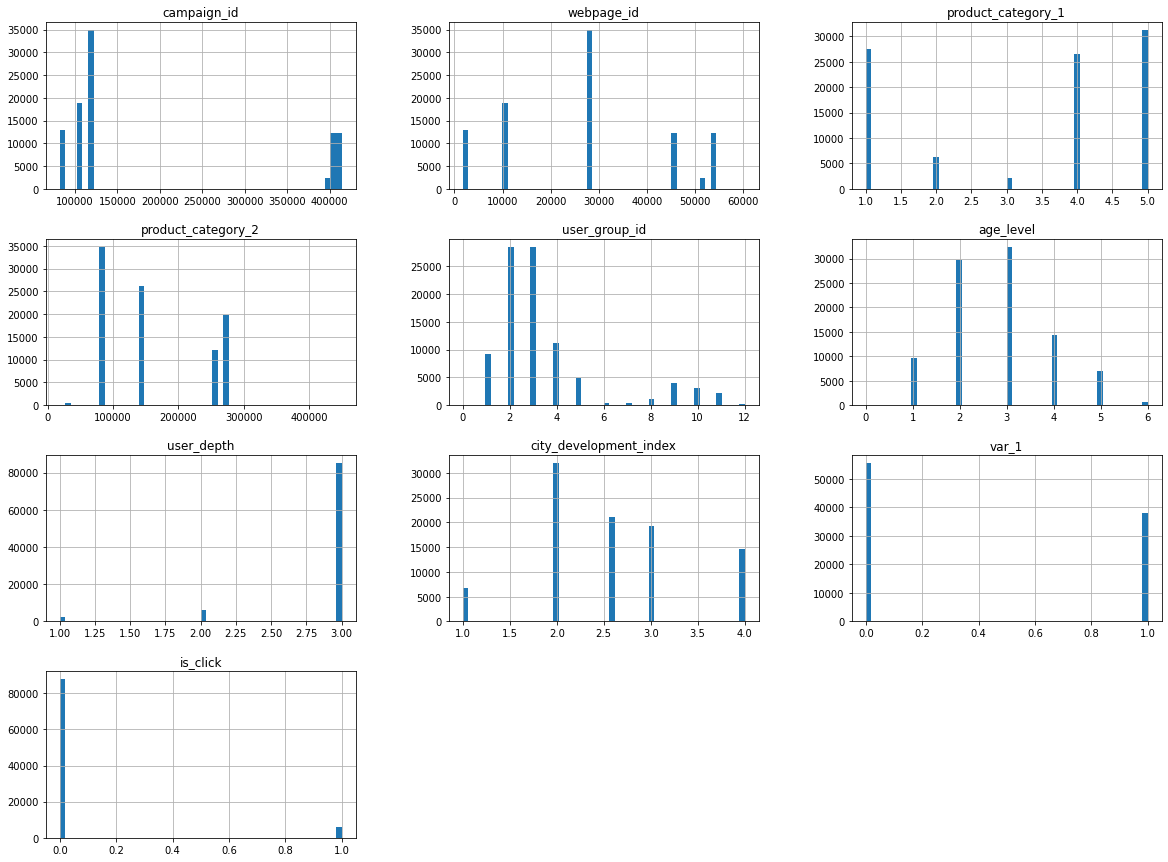

In [ ]:
# Select only the numeric variables
numeric_vars = data_train.select_dtypes(include=['float64', 'int64'])

# Plot the histograms
numeric_vars.hist(bins=50, figsize=(20,15))
plt.show()


**Q4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**


In [ ]:
# Method1

import statsmodels.api as sm

y_train = np.array(y_train, dtype=float)
dependent_var =y_train #data[['satisfaction_neutral or dissatisfied',

      # 'satisfaction_satisfied']]
independent_vars = X_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']]

# Fitting the OLS model
model = sm.OLS(dependent_var, independent_vars).fit()
p_values = model.summary2().tables[1]['P>|t|']
print(p_values.round(4))


campaign_id               0.0107
webpage_id                0.1358
product_category_1        0.4161
product_category_2        0.8856
user_group_id             0.5754
age_level                 0.5527
user_depth                0.4123
city_development_index    0.3099
var_1                     0.0032
product_A                 0.4136
product_B                 0.7433
product_C                 0.5363
product_D                 0.6899
product_E                 0.0027
product_F                 0.2737
product_G                 0.2784
product_H                 0.0636
product_I                 0.4652
product_J                 0.0004
gender_Female             0.9566
gender_Male               0.0000
Name: P>|t|, dtype: float64


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.58
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.19e-47
Time:                        02:19:37   Log-Likelihood:                -809.96
No. Observations:               93669   AIC:                             1660.
Df Residuals:                   93649   BIC:                             1849.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
campaign_id                0

In [ ]:
# Method2
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=5)
fit = selector.fit(independent_vars, dependent_var)

# Get the mask of selected features
mask = fit.get_support()

# Get the column names of selected features
selected_features = X_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']].columns[mask]

print("Selected Features:", selected_features)


Selected Features: Index(['campaign_id', 'product_A', 'product_E', 'product_G', 'product_H'], dtype='object')


In [ ]:
# Method3
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(classifier, random_state=1).fit(independent_vars, dependent_var)
eli5.show_weights(perm,top=None, feature_names = ['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male'])

Weight,Feature
0 ± 0.0000,gender_Male
0 ± 0.0000,product_A
0 ± 0.0000,webpage_id
0 ± 0.0000,product_category_1
0 ± 0.0000,product_category_2
0 ± 0.0000,user_group_id
0 ± 0.0000,age_level
0 ± 0.0000,user_depth
0 ± 0.0000,city_development_index
0 ± 0.0000,var_1


By SelectKBest we see that the 5 most important feature columns are:

campaign_id'<br>'product_A'<br> 'product_E'<br>'product_G'<br>'product_H'






**Q5 Which independent variables have missing data? How much?** <br>Yes, In both the datasets train and test we have missing values




In [ ]:
print("Missing values in Train Dataset")
print(missing_val_train)
print("*"*80)
print("Missing values in Test Dataset")
print(missing_val_test)


Missing values in Train Dataset
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64
********************************************************************************
Missing values in Test Dataset
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64



**Q6 Do the training and test sets have the same data?**<br>

In [ ]:
check = pd.merge(
    data_train,
    data_test,
    on=['product', 'campaign_id', 'webpage_id', 'product_category_1',
       'product_category_2', 'user_group_id', 'gender', 'age_level',
       'user_depth', 'city_development_index', 'var_1',],
    how="left",
    indicator="Exist",
)
check["Exist"] = np.where(check.Exist == "both", True, False)
print(
    check["Exist"].value_counts()
)  # 

True     8793518
False      30450
Name: Exist, dtype: int64


True indicates the data is similar 

**Q7 In the predictor variables independent of all the other predictor variables?**

Yes, as the majority of the data points are categorical, we can observe from the sns pairplot that there is no collinearity between the characteristics and that they are largely independent of one another.

**Q8 Which predictor variables are the most important?**





In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train[['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']], y_train)

# Get the feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]
li=['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'product_A', 'product_B', 'product_C', 'product_D',
       'product_E', 'product_F', 'product_G', 'product_H', 'product_I',
       'product_J', 'gender_Female', 'gender_Male']
# Print the feature names and their importances
for i in sorted_idx:
    print(f"{li[i]}: {importances[i]}")


city_development_index: 0.2218687232880973
user_group_id: 0.15224396015773922
age_level: 0.11628380064611857
user_depth: 0.1091629473025955
var_1: 0.09766066723038853
product_category_2: 0.040663917127404775
product_category_1: 0.035274661665967086
product_H: 0.03251397626574198
webpage_id: 0.030063123475933123
campaign_id: 0.025746666951999966
product_D: 0.02309290319255237
product_C: 0.018950070057727374
product_I: 0.015748588165558183
gender_Female: 0.015481360681083758
product_B: 0.01513641751628775
gender_Male: 0.014773275519742675
product_G: 0.011259150150760056
product_E: 0.010637886321629424
product_A: 0.00982199393752613
product_J: 0.0025626030922524805
product_F: 0.001053307252893765


**Q9. Do the ranges of the predictor variables make sense?** <br>
The means for Campaign ID,WebPageID and ProductCaregory2 are very different. However, it is evident that data is scattered broadly.


In [ ]:
print(data_train.describe().to_markdown())

|       |   campaign_id |   webpage_id |   product_category_1 |   product_category_2 |   user_group_id |   age_level |   user_depth |   city_development_index |        var_1 |      is_click |
|:------|--------------:|-------------:|---------------------:|---------------------:|----------------:|------------:|-------------:|-------------------------:|-------------:|--------------:|
| count |         93669 |      93669   |          93669       |              93669   |     93669       | 93669       |  93669       |             93669        | 93669        | 93669         |
| mean  |        194280 |      27434.5 |              3.29477 |             162342   |         3.50222 |     2.79818 |      2.88453 |                 2.57509  |     0.406186 |     0.0638205 |
| std   |        136393 |      17174.4 |              1.66554 |              79017.1 |         2.44731 |     1.09309 |      0.39003 |                 0.804005 |     0.491123 |     0.244434  |
| min   |         82320 |       1734   |

**Q10 What are the distributions of the predictor variables**

Most of the predictor variables in the dataset are categorical in nature, and after performing the histograms, we can see that most of the predictor variables have skewed distributions. Finally, by viewing the Q-Q plots, we can see that most of the data are not continuous

<b>Q11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?</b>



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
reg = LogisticRegression()
X1 = data_train[['product_category_1', 'webpage_id', 'user_depth', 'is_click', 'campaign_id', 'user_group_id', 'city_development_index', 'var_1', 'product_category_2', 'age_level']]
y1 = data_train[['is_click']]
X1_train_data, X1_test_data, y1_train_data, y1_test_data = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
reg.fit(X1_train_data, y1_train_data)
threshold = 0.5
reg.predict(X1_test_data)
Z = reg.predict(X1_test_data)
rms = mean_squared_error(y1_test_data, Z , squared=False);
out1=reg.score(X1_test_data, y1_test_data)
print(out1)

0.9355716878402904


In [ ]:

a1 = data_train.quantile(0.05)
a3 = data_train.quantile(0.95)

final_data = data_train[~((data_train < (a1)) |(data_train > (a3))).any(axis=1)]

In [ ]:
X2 = final_data[['product_category_1', 'webpage_id', 'user_depth', 'is_click', 'campaign_id', 'user_group_id', 'city_development_index', 'var_1', 'product_category_2', 'age_level']]
y2 = final_data[['is_click']]

X2_train_data, X2_test_data, y2_train_data, y2_test_data = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
reg.fit(X2_train_data, y2_train_data)

LogisticRegression()

In [ ]:
threshold = 0.5
reg.predict(X2_test_data)
Z2 = reg.predict(X2_test_data)
out2=reg.score(X2_test_data, y2_test_data)
print(out2)

0.9362995794976702


Removing the outliners didnt add much to the acccuracy

In [ ]:
print('Diff:',out2-out1)

Diff: 0.0007278916573797423


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y1_test_data,Z))
print(confusion_matrix(y1_test_data,Z))
print("Accuracy 1: ",out1)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17538
           1       0.00      0.00      0.00      1196

    accuracy                           0.94     18734
   macro avg       0.47      0.50      0.48     18734
weighted avg       0.88      0.94      0.90     18734

[[17527    11]
 [ 1196     0]]
Accuracy 1:  0.9355716878402904


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
print(classification_report(y2_test_data,Z2))
print(confusion_matrix(y2_test_data,Z2))
print("Accuracy 2: ",out2)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16477
           1       0.00      0.00      0.00      1121

    accuracy                           0.94     17598
   macro avg       0.47      0.50      0.48     17598
weighted avg       0.88      0.94      0.91     17598

[[16477     0]
 [ 1121     0]]
Accuracy 2:  0.9362995794976702


<b>Q12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.</b><br>
Please refer the imputation section


# References
*  https://towardsdatascience.com/logistic-regression-with-dummy-variables-step-by-step-6a9f44aaedfb
*   https://towardsdatascience.com/one-hot-encoding-and-logistic-regression-3f6b3c79b0e8
*    https://towardsdatascience.com/min-max-scaler-in-machine-learning-fad2f2e1daf7
*   Sckit learn offcial documentation
*   Refered Towards Data Science
*   Eli5 official documentation

# Conclusion

It is evident from the analysis of the data set done above that no-colinearity exists and that ecxpet length and all other dependent variables are important.Also understood what variables are important for training the data.

Copyright 2023 Rhea Bajpai

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.